# GDP vs Measles Vaccination

In this project we seek to analyze the GDP for selected countries depending on the child measles vaccination rates. 

Imports and set magics:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
import seaborn as sns

# autoreload modules when code is run
%load_ext autoreload
%autoreload 2

# user written modules
import dataproject


We have imported data in cvs-files from the OECD Databank. 

**The 1st dataset:**
The first dataset is an overview of GDP per capita for 7 countries in the world from 2018 to 2021. The included variables are year, GDP per capita and country. 

**The 2nd dataset:**
The second dataset is an overview of child vaccination rates for 7 countries in the world from 2018 to 2021. The included variables are year, child measles vaccination rates and country. 

# Importing and cleaning the first dataset

In [2]:
#import data
filename = 'GDP2.xlsx'
pd.read_excel(filename).head(7)

gdp = pd.read_excel(filename, skiprows=2)
gdp.head(7)


,Unnamed: 0,Unnamed: 1,Unnamed: 2,2018,2019,2020,2021
0,NaN,NaN,Argentina,23290.7,14407.4,20981.4,23856.7
1,NaN,NaN,Australia,52991.2,52732.2,55690.3,61974.8
2,NaN,NaN,China,15466.3,16624.5,17176.9,19429.1
3,NaN,NaN,Denmark,57479.4,59884.1,60846.8,64914.2
4,NaN,NaN,Ireland,84824.0,89846.7,94038.0,106879.2
5,NaN,NaN,Mexico,20561.2,20244.6,18465.6,19438.8
6,NaN,NaN,UK,47219.5,49317.7,45872.2,49814.9


In [3]:
#Removing the first columns
drop_these = ['Unnamed: ' + str(num) for num in range(2)]
gdp.drop(drop_these, axis=1, inplace=True)
gdp.head(7)

,Unnamed: 2,2018,2019,2020,2021
0,Argentina,23290.7,14407.4,20981.4,23856.7
1,Australia,52991.2,52732.2,55690.3,61974.8
2,China,15466.3,16624.5,17176.9,19429.1
3,Denmark,57479.4,59884.1,60846.8,64914.2
4,Ireland,84824.0,89846.7,94038.0,106879.2
5,Mexico,20561.2,20244.6,18465.6,19438.8
6,UK,47219.5,49317.7,45872.2,49814.9


In [4]:
#Renaming the columns
gdp.rename(columns = {'Unnamed: 2':'country'}, inplace=True)
gdp.rename(columns = {2018:'gdp2018'}, inplace=True)
gdp.rename(columns = {2019:'gdp2019'}, inplace=True)
gdp.rename(columns = {2020:'gdp2020'}, inplace=True)
gdp.rename(columns = {2021:'gdp2021'}, inplace=True)
gdp.head(7)

,country,gdp2018,gdp2019,gdp2020,gdp2021
0,Argentina,23290.7,14407.4,20981.4,23856.7
1,Australia,52991.2,52732.2,55690.3,61974.8
2,China,15466.3,16624.5,17176.9,19429.1
3,Denmark,57479.4,59884.1,60846.8,64914.2
4,Ireland,84824.0,89846.7,94038.0,106879.2
5,Mexico,20561.2,20244.6,18465.6,19438.8
6,UK,47219.5,49317.7,45872.2,49814.9


In [5]:
#Resetting the index
gdp.reset_index(inplace = True, drop = True)
gdp.iloc[0:7,:]

,country,gdp2018,gdp2019,gdp2020,gdp2021
0,Argentina,23290.7,14407.4,20981.4,23856.7
1,Australia,52991.2,52732.2,55690.3,61974.8
2,China,15466.3,16624.5,17176.9,19429.1
3,Denmark,57479.4,59884.1,60846.8,64914.2
4,Ireland,84824.0,89846.7,94038.0,106879.2
5,Mexico,20561.2,20244.6,18465.6,19438.8
6,UK,47219.5,49317.7,45872.2,49814.9


In [6]:
#Changing from wide to long
gdp_long = pd.wide_to_long(gdp, stubnames='gdp', i='country', j='year')
gdp_long.head(7)

,,gdp
country,year,
Argentina,2018,23290.7
Australia,2018,52991.2
China,2018,15466.3
Denmark,2018,57479.4
Ireland,2018,84824.0
Mexico,2018,20561.2
UK,2018,47219.5


In [7]:
gdp_long = gdp_long.reset_index()
gdp_long.loc[gdp_long.country == 'China', :]

,country,year,gdp
2,China,2018,15466.3
9,China,2019,16624.5
16,China,2020,17176.9
23,China,2021,19429.1


**Plotting the first dataset**

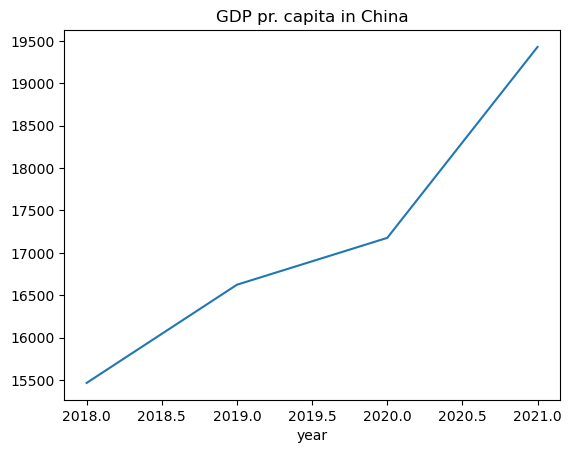

In [8]:
gdp_china = gdp_long.loc[gdp_long.country == 'China', :]
gdp_china.plot(x='year', y='gdp', legend=False);
plt.title("GDP pr. capita in China")
plt.show()

# Importing and cleaning the second dataset

In [9]:
#import data
filename = 'vac.xlsx'
pd.read_excel(filename).head(7)

vac = pd.read_excel(filename)
vac.head(7)

,Unnamed: 0,2018,2019,2020,2021
0,Argentina,94.0,86.0,77.3,80.7
1,Australia,95.0,95.0,95.0,92.7
2,China,98.6,98.8,99.2,99.4
3,Denmark,94.0,95.0,93.6,94.1
4,Ireland,92.3,91.0,91.8,90.4
5,Mexico,97.0,73.0,73.0,89.0
6,UK,92.0,91.0,91.1,90.9


In [10]:
#Renaming the columns
vac.rename(columns = {'Unnamed: 0':'country'}, inplace=True)
vac.rename(columns = {2018:'vac2018'}, inplace=True)
vac.rename(columns = {2019:'vac2019'}, inplace=True)
vac.rename(columns = {2020:'vac2020'}, inplace=True)
vac.rename(columns = {2021:'vac2021'}, inplace=True)
vac.head(7)

,country,vac2018,vac2019,vac2020,vac2021
0,Argentina,94.0,86.0,77.3,80.7
1,Australia,95.0,95.0,95.0,92.7
2,China,98.6,98.8,99.2,99.4
3,Denmark,94.0,95.0,93.6,94.1
4,Ireland,92.3,91.0,91.8,90.4
5,Mexico,97.0,73.0,73.0,89.0
6,UK,92.0,91.0,91.1,90.9


In [11]:
#Resetting the index
vac.reset_index(inplace = True, drop = True)
vac.iloc[0:7,:]

,country,vac2018,vac2019,vac2020,vac2021
0,Argentina,94.0,86.0,77.3,80.7
1,Australia,95.0,95.0,95.0,92.7
2,China,98.6,98.8,99.2,99.4
3,Denmark,94.0,95.0,93.6,94.1
4,Ireland,92.3,91.0,91.8,90.4
5,Mexico,97.0,73.0,73.0,89.0
6,UK,92.0,91.0,91.1,90.9


In [12]:
#Changing from wide to long
vac_long = pd.wide_to_long(vac, stubnames='vac', i='country', j='year')
vac_long.head(7)

,,vac
country,year,
Argentina,2018,94.0
Australia,2018,95.0
China,2018,98.6
Denmark,2018,94.0
Ireland,2018,92.3
Mexico,2018,97.0
UK,2018,92.0


## Explore each data set

In order to be able to **explore the raw data**, you may provide **static** and **interactive plots** to show important developments 

**Plotting the vaccine rates for China in a static figure**

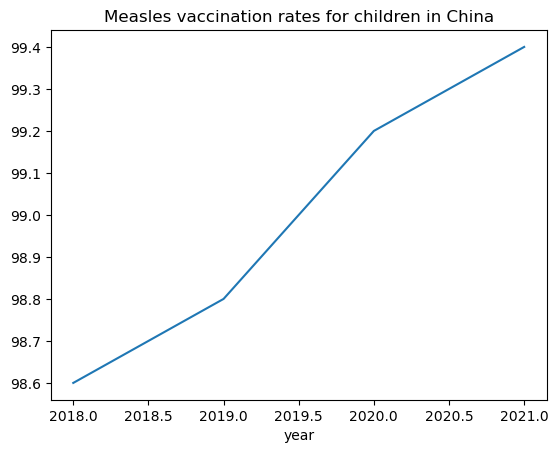

In [13]:
vac_long = vac_long.reset_index()
vac_long.loc[vac_long.country == 'China', :]

vac_china = vac_long.loc[vac_long.country == 'China', :]
vac_china.plot(x='year', y='vac', legend=False);
plt.title("Measles vaccination rates for children in China")
plt.show()

**Interactive plot** :

Explain what you see when moving elements of the interactive plot around. 

# Merge data sets

Now we combine our loaded data sets. 

In [14]:
inner = pd.merge(gdp,vac, how='left' ,on=['country'])
print(inner)

     country  gdp2018  gdp2019  gdp2020   gdp2021  vac2018  vac2019  vac2020  \
0  Argentina  23290.7  14407.4  20981.4   23856.7     94.0     86.0     77.3   
1  Australia  52991.2  52732.2  55690.3   61974.8     95.0     95.0     95.0   
2      China  15466.3  16624.5  17176.9   19429.1     98.6     98.8     99.2   
3    Denmark  57479.4  59884.1  60846.8   64914.2     94.0     95.0     93.6   
4    Ireland  84824.0  89846.7  94038.0  106879.2     92.3     91.0     91.8   
5     Mexico  20561.2  20244.6  18465.6   19438.8     97.0     73.0     73.0   
6         UK  47219.5  49317.7  45872.2   49814.9     92.0     91.0     91.1   

   vac2021  
0     80.7  
1     92.7  
2     99.4  
3     94.1  
4     90.4  
5     89.0  
6     90.9  


In [15]:
#Changing from wide to long
inner_long = pd.wide_to_long(inner, stubnames=['gdp', 'vac'], i='country', j='year')
inner_long.head(7)

,,gdp,vac
country,year,,
Argentina,2018,23290.7,94.0
Australia,2018,52991.2,95.0
China,2018,15466.3,98.6
Denmark,2018,57479.4,94.0
Ireland,2018,84824.0,92.3
Mexico,2018,20561.2,97.0
UK,2018,47219.5,92.0


Here we are dropping elements from both data set X and data set Y. A left join would keep all observations in data X intact and subset only from Y. 

Make sure that your resulting data sets have the correct number of rows and columns. That is, be clear about which observations are thrown away. 

**Note:** Don't make Venn diagrams in your own data project. It is just for exposition. 

# Analysis

To get a quick overview of the data, we show some **summary statistics** on a meaningful aggregation. 

In [16]:
inner_long.groupby(['country'])['gdp', 'vac'].describe().head(7)

/var/folders/bx/p8b0mkgd45q51402mwt0zkqm0000gn/T/ipykernel_77823/2250151401.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  inner_long.groupby(['country'])['gdp', 'vac'].describe().head(7)


gdp                                                        \
          count       mean          std      min        25%       50%   
country                                                                 
Argentina   4.0  20634.050  4333.400685  14407.4  19337.900  22136.05   
Australia   4.0  55847.125  4298.529219  52732.2  52926.450  54340.75   
China       4.0  17174.200  1663.698070  15466.3  16334.950  16900.70   
Denmark     4.0  60781.125  3097.992037  57479.4  59282.925  60365.45   
Ireland     4.0  93896.975  9438.955750  84824.0  88591.025  91942.35   
Mexico      4.0  19677.550   935.985646  18465.6  19195.500  19841.70   
UK          4.0  48056.075  1839.776324  45872.2  46882.675  48268.60   

                                 vac                                          \
                 75%       max count    mean        std   min     25%    50%   
country                                                                        
Argentina  23432.200   23856.7   4.0  84.500   7.275072  77.3  79.850  83.35   
Australia  57261.425   61974.8   4.0  94.425   1.150000  92.7  94.425  95.00   
China      17739.950   19429.1   4.0  99.000   0.365148  98.6  98.750  99.00   
Denmark    61863.650   64914.2   4.0  94.175   0.590903  93.6  93.900  94.05   
Ireland    97248.300  106879.2   4.0  91.375   0.842120  90.4  90.850  91.40   
Mexico     20323.750   20561.2   4.0  83.000  12.000000  73.0  73.000  81.00   
UK         49442.000   49814.9   4.0  91.250   0.506623  90.9  90.975  91.05   

                         
              75%   max  
country                  
Argentina  88.000  94.0  
Australia  95.000  95.0  
China      99.250  99.4  
Denmark    94.325  95.0  
Ireland    91.925  92.3  
Mexico     91.000  97.0  
UK         91.325  92.0

MAKE FURTHER ANALYSIS. EXPLAIN THE CODE BRIEFLY AND SUMMARIZE THE RESULTS.

/var/folders/bx/p8b0mkgd45q51402mwt0zkqm0000gn/T/ipykernel_77823/3876230529.py:6: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  inner_long.groupby('year')['gdp', 'vac'].mean().plot(ax=ax,style='-o')


KeyError: 'country'

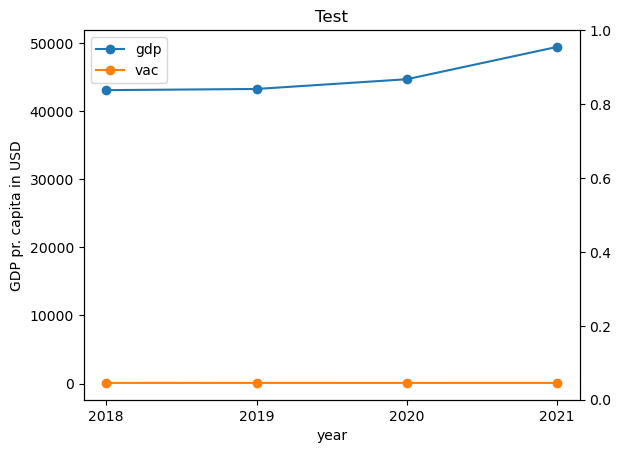

In [17]:
# We create a figure
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

# We group by years and choose only to look at the wages for men and women
inner_long.groupby('year')['gdp', 'vac'].mean().plot(ax=ax,style='-o')

# We set the labels and title
ax.xaxis.set_ticks(np.arange(2018, 2022, 1))
ax.set_ylabel('GDP pr. capita in USD')
ax.set_title('Test');

# We dublicate the above figure to be able to make two y-axis
ax2=ax.twinx()

# Creating the plot
ax2.plot(inner_long['country'], inner_long["vac"],color="maroon",marker="o",label='GDP')
ax2.set_ylabel("Measles vaccination rate for children")
ax2.legend(loc='center left', bbox_to_anchor=(1.15, 0.63))
ax.legend(loc='center left', bbox_to_anchor=(1.15, 0.75))



# Conclusion

ADD CONCISE CONLUSION.